In [25]:
import tensorflow as tf
import keras
import pandas
import sklearn
import matplotlib


2022-02-18 15:40:50.764361: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-18 15:40:50.764447: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [26]:
import pandas as pd
df = pd.read_csv('housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [33]:
dataset = df.values
x = dataset[:,0:10]
y = dataset[:,10]

In [34]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)

In [35]:
x_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(x_scale, y, test_size=0.3)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=0.5)
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [38]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model.fit(x_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(x_val, y_val))

    

Epoch 1/100


2022-02-18 15:53:06.118497: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-18 15:53:06.118520: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-18 15:53:06.118537: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Z238-UL): /proc/driver/nvidia/version does not exist
2022-02-18 15:53:06.147550: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


32/32 [==============================] - 0s 5ms/step - loss: 0.6796 - accuracy: 0.5558 - val_loss: 0.6789 - val_accuracy: 0.5571
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.6663 - val_loss: 0.6720 - val_accuracy: 0.7032
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.7368 - val_loss: 0.6660 - val_accuracy: 0.7580
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.7632 - val_loss: 0.6600 - val_accuracy: 0.7854
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6571 - accuracy: 0.7740 - val_loss: 0.6537 - val_accuracy: 0.7945
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.7916 - val_loss: 0.6471 - val_accuracy: 0.7945
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.7935 - val_loss: 0.6403 - val_accuracy: 0.7945
Epoch 8/100
32/32 [======

Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.8787 - val_loss: 0.3169 - val_accuracy: 0.8767
Epoch 60/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3080 - accuracy: 0.8836 - val_loss: 0.3152 - val_accuracy: 0.8584
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3075 - accuracy: 0.8757 - val_loss: 0.3147 - val_accuracy: 0.8767
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.8806 - val_loss: 0.3124 - val_accuracy: 0.8767
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3053 - accuracy: 0.8796 - val_loss: 0.3109 - val_accuracy: 0.8721
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3032 - accuracy: 0.8757 - val_loss: 0.3106 - val_accuracy: 0.8767
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3023 - accuracy: 0.8767 - val_loss: 0.3091 - val_accuracy: 0.8767
Epoch 

In [40]:
model.evaluate(x_test, y_test)[1]

7/7 [==============================] - 0s 994us/step - loss: 0.2487 - accuracy: 0.9132


0.913241982460022

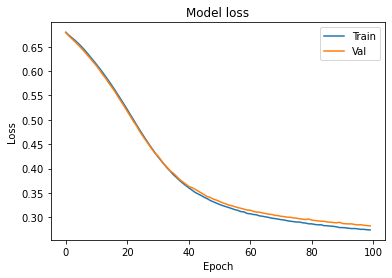

In [41]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()